In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
crime = pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.shape

(50, 5)

In [6]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])


In [7]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)


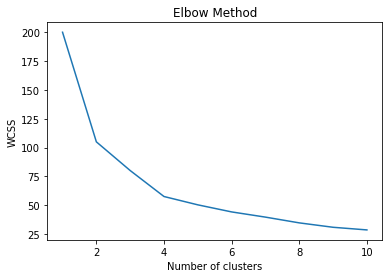

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
crime_clusters_new = KMeans(4, random_state=42)
crime_clusters_new.fit(scaled_crime)


KMeans(n_clusters=4, random_state=42)

In [11]:
crime_clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [13]:
#Assign clusters to the data set
crime['clusterid_new'] = crime_clusters_new.labels_

In [14]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308
